# Project Overview
In this project, we uncover valuable insights from the "E-Commerce Shipping Data" of an international e-commerce company specializing in electronic products. 

The primary objective was to leverage advanced machine learning techniques to study customer behavior and improve the company's shipping processes.


# Problem Statement

- An international e-commerce company based wants to discover key insights from their customer database. 
- They want to use some of the most advanced machine learning techniques to study their customers.
- The company sells electronic products.



# Key Questions Explored (Exploratory Data Analysis)
- Customer Rating vs. On-Time Delivery
- Shipment Modes Analysis
- Customer Rating's Impact on On-Time Delivery
elivery.

# Methodology
To answer these intriguing questions, we followed a rigorous methodology:

# Data Preprocessing, Data Modeling and Performance metrics:
we have implement preprocessing techniques such as ordinal and one-hot encoding using column transformers to prepare the data for modeling. Modeling
Utilized a variety of classification models, including:
- SGDClassifier
- LogisticRegression
- RandomForest
- KNNClassifier


# Hyperparameter Tuning
Fine-tuned the selected model's hyperparameters using GridSearchCV for optimal performance.

# Performance Metrics:
Generated a comprehensive classification report and various other performance metrics to thoroughly assess the model's capabilities.

# Dataset
The dataset used for model building contained 10999 observations of 12 variables.
- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment: The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in grams: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [46]:
# import important library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,GridSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
# Load the dataset into a pandas DataFrame and display the first few rows.
file_path = r'C:\Users\jay.chaudhary\Desktop\Capstone_Project\E_Commerce.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [14]:
df.groupby(["Mode_of_Shipment"])["Weight_in_gms"].count()

Mode_of_Shipment
Flight    1777
Road      1760
Ship      7462
Name: Weight_in_gms, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [18]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [20]:
df.drop("ID",axis = 1,inplace = True)

# If Product importance is high. having higest rating or being delivered on time?

In [24]:
df.groupby(["Product_importance","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()

Product_importance  Reached.on.Time_Y.N
high                0                       332
                    1                       616
low                 0                      2157
                    1                      3140
medium              0                      1947
                    1                      2807
Name: Reached.on.Time_Y.N, dtype: int64

- It is difficult to interpret the product delivery based on product important as product are not delivered are less than 50% for all categories

Mode_of_Shipment  Reached.on.Time_Y.N
Flight            0                       708
                  1                      1069
Road              0                       725
                  1                      1035
Ship              0                      3003
                  1                      4459
Name: Reached.on.Time_Y.N, dtype: int64 


Mode_of_Shipment  Reached.on.Time_Y.N
Flight            0                      0.398424
                  1                      0.601576
Road              0                      0.411932
                  1                      0.588068
Ship              0                      0.402439
                  1                      0.597561
Name: Reached.on.Time_Y.N, dtype: float64


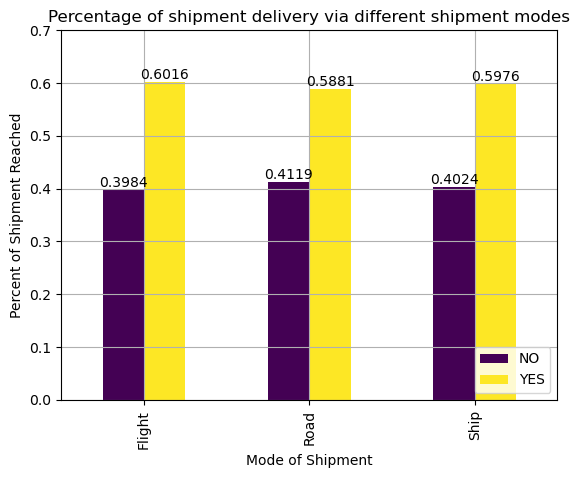

In [28]:
print(df.groupby(["Mode_of_Shipment","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count(),"\n\n")
print(df.groupby(["Mode_of_Shipment","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()/df.groupby(["Mode_of_Shipment"])["Reached.on.Time_Y.N"].count())

grouped = (df.groupby(["Mode_of_Shipment","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()/df.groupby(["Mode_of_Shipment"])["Reached.on.Time_Y.N"].count()).unstack(fill_value=0)

# plot the grouped dataframe as a stacked bar chart
ax = grouped.plot(kind='bar', stacked=False,colormap = "viridis")

# set the x-axis label
ax.set_xlabel('Mode of Shipment')

# set the y-axis label
ax.set_ylabel('Percent of Shipment Reached')

plt.legend(labels = ["No","Yes"])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.yticks([i*0.0001 for i in range(0,8000,1000)])
plt.grid(True)
plt.legend(loc = "lower right",labels = ["NO","YES"])
plt.title("Percentage of shipment delivery via different shipment modes")
# show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


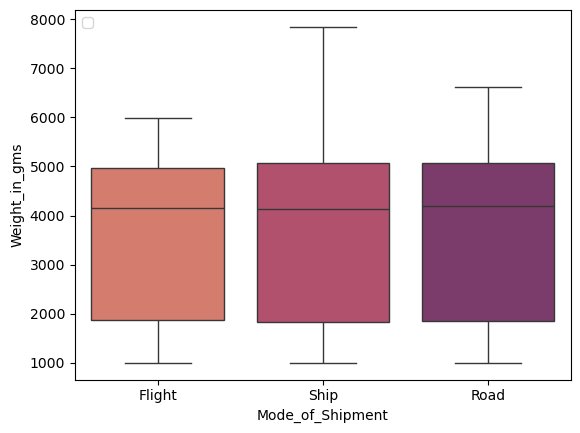

In [30]:
x = [df[df["Mode_of_Shipment"] == "Flight"]["Weight_in_gms"],df[df["Mode_of_Shipment"] == "Road"]["Weight_in_gms"],df[df["Mode_of_Shipment"] == "Ship"]["Weight_in_gms"]]

ax = sns.boxplot(data = df,x = df["Mode_of_Shipment"],y= df["Weight_in_gms"],hue =df["Mode_of_Shipment"], palette="flare")

# Set the color of the median lines
plt.legend(loc = "upper left")

Although there's not much difference in the mode of shipment based on weight but it seems that company tends to ship packages with higher weights via "Ship" mode and as seen previously, they have almost similar conversion of packages reaching on time as that of "Flight Mode"

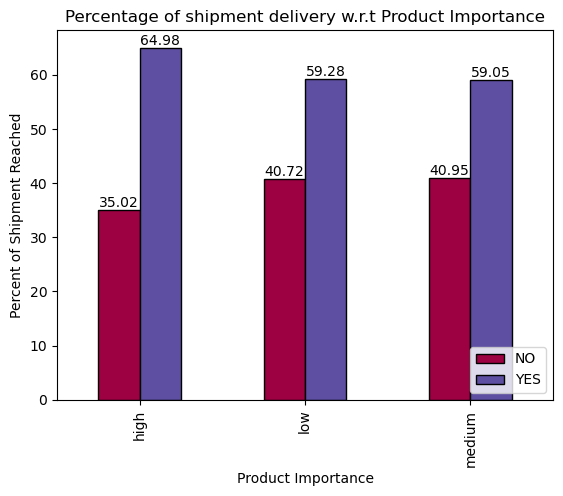

In [33]:
grouped = ((df.groupby(["Product_importance","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()/df.groupby(["Product_importance"])["Reached.on.Time_Y.N"].count()*100)).unstack(fill_value=0)

# plot the grouped dataframe as a stacked bar chart
ax = grouped.plot(kind='bar', stacked=False,colormap = "Spectral",edgecolor = "black")

# set the x-axis label
ax.set_xlabel('Product Importance')

# set the y-axis label
ax.set_ylabel('Percent of Shipment Reached')

plt.legend(labels = ["No","Yes"])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')



plt.legend(loc = "lower right",labels = ["NO","YES"])
plt.title("Percentage of shipment delivery w.r.t Product Importance")
# show the plot
plt.show()

There are instances where high product importance actually increases the count of shipment being reached on time !!

# We will check how is the conversion of shipment received on time or not is affected by customer rating

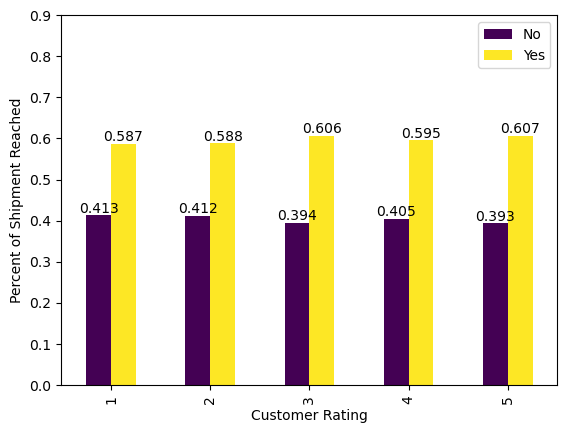

In [37]:
grouped = (df.groupby(["Customer_rating","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()/df.groupby(["Customer_rating"])["Reached.on.Time_Y.N"].count()).unstack(fill_value=0)

# plot the grouped dataframe as a stacked bar chart
ax = grouped.plot(kind='bar', stacked=False,colormap = "viridis")

# set the x-axis label
ax.set_xlabel('Customer Rating')

# set the y-axis label
ax.set_ylabel('Percent of Shipment Reached')

plt.yticks([i*0.01 for i in range(0,100,10)])

plt.legend(labels = ["No","Yes"])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

Again not a major differentiator when it comes to Customer Rating

In [40]:
cols = df.columns.groupby(df.dtypes)
cols

{int64: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N'], object: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']}

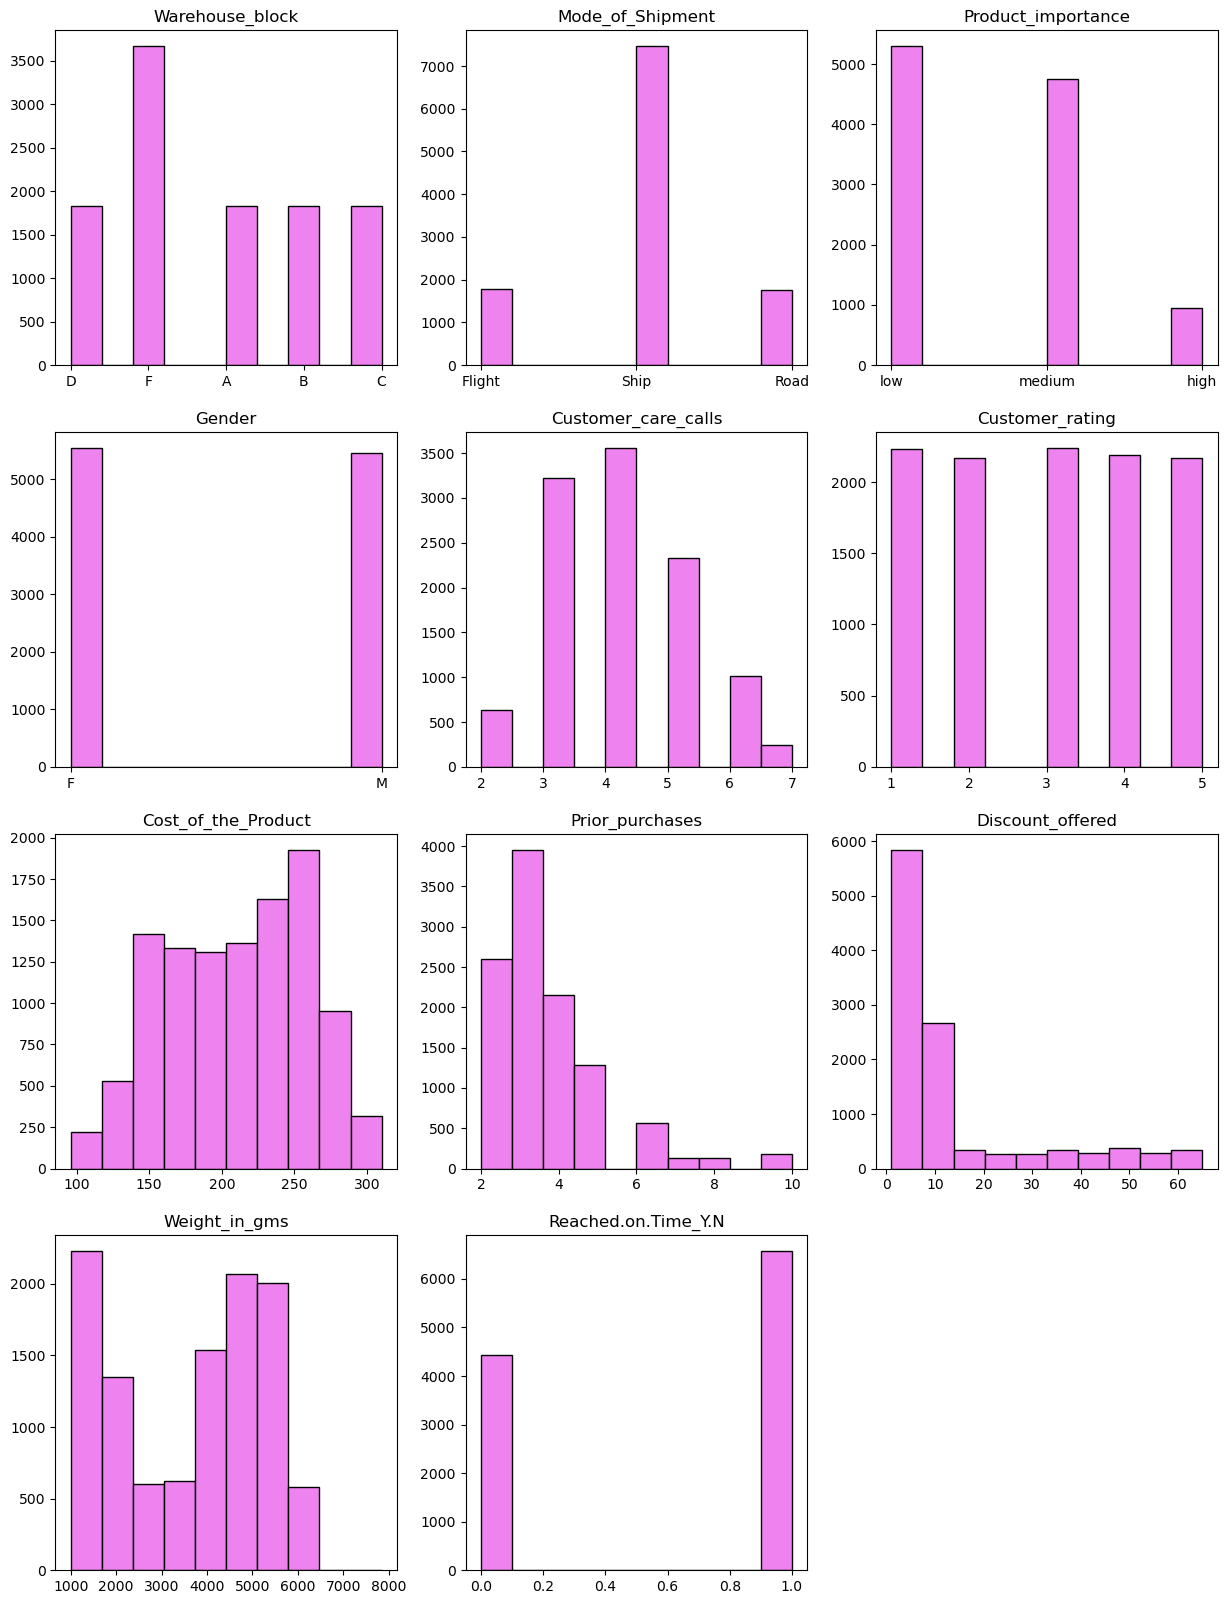

In [42]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
fig = plt.figure(figsize=(15, 20))

for i in range(len(cols)):
  ax = fig.add_subplot(4, 3, i + 1)
  ax.hist(df[cols[i]],edgecolor = "black",color = "violet")
  ax.set_title(cols[i])
  

# Observation
- F category product is highest
- Mostly products are delivered through ships
- there is no significant difference in the order for Gender
- Customer mostly calls 4 times
- Customer ratings are mostly equally spread
- Only few products have higher discount rate
- low and medium products are higher in quantity than high category products

In [83]:
# Train test split
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20,random_state = 20)
for train_index,test_index in split.split(np.zeros(len(df)),np.array(df["Reached.on.Time_Y.N"])):
    train = df.loc[train_index]
    test = df.loc[test_index]


In [85]:
train.rename(columns = {"Reached.on.Time_Y.N":"reached_ontime"},inplace=True)
test.rename(columns = {"Reached.on.Time_Y.N":"reached_ontime"},inplace=True)
test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,reached_ontime
6652,2,Ship,3,4,235,2,low,0,10,4575,0
8343,1,Road,4,5,219,5,low,1,2,1260,0
1398,3,Ship,6,3,213,3,low,1,17,1656,1
9799,4,Ship,4,2,170,2,low,1,3,4299,0
7716,3,Ship,6,2,306,4,low,0,1,1815,1


In [87]:
xtrain = train.drop("reached_ontime",axis = 1)
ytrain = train["reached_ontime"]

xtest = test.drop("reached_ontime",axis = 1)
ytest = test["reached_ontime"]

In [89]:
ordi = ['Product_importance', 'Gender']
onehot = ['Warehouse_block', 'Mode_of_Shipment']

cols = ColumnTransformer([("ordi",OrdinalEncoder(),ordi),
                         ("onehot",OneHotEncoder(),onehot)],remainder="passthrough",verbose_feature_names_out=False)
                         
xtrain = cols.fit_transform(xtrain)
print(xtrain)

[[1.000e+00 1.000e+00 0.000e+00 ... 4.000e+00 3.000e+00 5.295e+03]
 [2.000e+00 1.000e+00 0.000e+00 ... 5.000e+00 4.400e+01 1.269e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 5.000e+00 9.000e+00 1.716e+03]
 ...
 [2.000e+00 0.000e+00 0.000e+00 ... 4.000e+00 2.000e+00 4.133e+03]
 [2.000e+00 1.000e+00 0.000e+00 ... 4.000e+00 7.000e+00 1.813e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 5.000e+00 6.000e+00 1.119e+03]]


In [91]:
std = StandardScaler()
xtrain = std.fit_transform(xtrain)
xtrain

array([[-0.55252868,  1.0042139 , -0.44840239, ...,  0.28334156,
        -0.63794502,  1.01581625],
       [ 1.03730122,  1.0042139 , -0.44840239, ...,  0.93959911,
         1.90466567, -1.44955142],
       [-0.55252868, -0.99580378, -0.44840239, ...,  0.93959911,
        -0.26585565, -1.1758258 ],
       ...,
       [ 1.03730122, -0.99580378, -0.44840239, ...,  0.28334156,
        -0.69995991,  0.30425211],
       [ 1.03730122,  1.0042139 , -0.44840239, ...,  0.28334156,
        -0.38988544, -1.11642672],
       [-0.55252868,  1.0042139 , -0.44840239, ...,  0.93959911,
        -0.45190033, -1.54140565]])

# Using SGDClassifier

In [96]:
param = {"max_iter":[1000,1500,2000,500],
        "eta0":[0,0.1,1,10,0.01],
        "tol" :[0.1,0.01,0.001],
        "learning_rate" :["constant","optimal","invscaling"]}

gs_sgd = GridSearchCV(SGDClassifier(early_stopping=True,random_state = 20),param_grid= param,cv = 5,scoring = 'f1')

gs_sgd.fit(xtrain,ytrain)

gs_sgd.best_estimator_

C:\Users\jay.chaudhary\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jay.chaudhary\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jay.chaudhary\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jay.chaudhary\AppData\Local\anaco

SGDClassifier(early_stopping=True, eta0=0.01, learning_rate='invscaling',
              random_state=20, tol=0.1)

In [98]:
gs_sgd.best_estimator_.fit(xtrain,ytrain)
ypred_sgd = gs_sgd.best_estimator_.predict(xtrain)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,ypred_sgd))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64      3549
           1       0.78      0.61      0.68      5250

    accuracy                           0.66      8799
   macro avg       0.67      0.68      0.66      8799
weighted avg       0.69      0.66      0.67      8799



Using SGDCClassifier Accuracy of the model is 66%

# Using LogisticRegression

In [102]:
param = {"penalty" :["l1","l2","elasticnet"],
        "tol":[0.1,0.001,0.01],
        "C" :[1,0.1,10,0.01],
        "solver" :["lbfgs","saga"],
        "max_iter" : [100,1000,2000]}

gs_lr = GridSearchCV(LogisticRegression(random_state = 20),param_grid = param,cv =5,scoring ='f1')

gs_lr.fit(xtrain,ytrain)

gs_lr.best_estimator_

C:\Users\jay.chaudhary\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jay.chaudhary\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jay.chaudhary\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jay.chaudhary\AppData\Local\anac

LogisticRegression(C=0.01, penalty='l1', random_state=20, solver='saga',
                   tol=0.01)

In [104]:
gs_lr.best_estimator_.fit(xtrain,ytrain)
ypred_lr = gs_lr.best_estimator_.predict(xtrain)

In [106]:
print(classification_report(ytrain,ypred_lr))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      3549
           1       0.69      0.70      0.70      5250

    accuracy                           0.64      8799
   macro avg       0.62      0.62      0.62      8799
weighted avg       0.64      0.64      0.64      8799



Using Logistic Regression the accuracy of the model is 64%.

In [108]:
param = {"n_estimators":[10,20],
        "bootstrap":[True,False],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

gs_rf = GridSearchCV(RandomForestClassifier(max_features = None,random_state = 20),param_grid = param,cv =5,scoring ='f1')

gs_rf.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=None,
                                              random_state=20),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20]},
             scoring='f1')

In [110]:
gs_rf.best_estimator_

RandomForestClassifier(max_features=None, min_samples_split=6, n_estimators=10,
                       random_state=20)

In [112]:
gs_rf.best_estimator_.fit(xtrain,ytrain)
ypred_rf = gs_rf.best_estimator_.predict(xtrain)

In [114]:
print(classification_report(ytrain,ypred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3549
           1       0.98      0.97      0.98      5250

    accuracy                           0.97      8799
   macro avg       0.97      0.97      0.97      8799
weighted avg       0.97      0.97      0.97      8799



Using Random forest with GridSearchCV the accuracy of the model is 97%. Can be consider good model for this problem statement

In [116]:
param = {"n_neighbors": [1,2,3,4,5,6,8,9,10],
        "weights": ['uniform', 'distance'],
        "metric":["euclidean", "manhattan", "chebyshev","minkowski"]}

gs_knn = GridSearchCV(KNeighborsClassifier(algorithm = "ball_tree"),param_grid = param,cv = 5,scoring = 'f1')

gs_knn.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(algorithm='ball_tree'),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [118]:
gs_knn.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=8,
                     weights='distance')

In [120]:
gs_knn.best_estimator_.fit(xtrain,ytrain)
ypred_knn = gs_knn.best_estimator_.predict(xtrain)

In [122]:
print(classification_report(ytrain,ypred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3549
           1       1.00      1.00      1.00      5250

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799



Though accuracy of the model is 100%, it leads to overfitting the model

Preprocessing TEST DATA

In [126]:
xtest = cols.transform(xtest)
print(xtest)

[[1.000e+00 0.000e+00 0.000e+00 ... 2.000e+00 1.000e+01 4.575e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 5.000e+00 2.000e+00 1.260e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 3.000e+00 1.700e+01 1.656e+03]
 ...
 [2.000e+00 0.000e+00 0.000e+00 ... 4.000e+00 8.000e+00 4.357e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 6.000e+00 8.000e+00 1.932e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 3.000e+00 1.600e+01 1.563e+03]]


In [128]:
xtest = std.transform(xtest)
xtest

array([[-0.55252868, -0.99580378, -0.44840239, ..., -1.02917353,
        -0.20384075,  0.57491593],
       [-0.55252868,  1.0042139 , -0.44840239, ...,  0.93959911,
        -0.69995991, -1.45506267],
       [-0.55252868,  1.0042139 , -0.44840239, ..., -0.37291598,
         0.23026351, -1.21256749],
       ...,
       [ 1.03730122, -0.99580378, -0.44840239, ...,  0.28334156,
        -0.32787054,  0.4414211 ],
       [-0.55252868,  1.0042139 , -0.44840239, ...,  1.59585666,
        -0.32787054, -1.0435557 ],
       [-0.55252868,  1.0042139 , -0.44840239, ..., -0.37291598,
         0.16824862, -1.26951712]])

In [136]:
ytest_pred = gs_rf.best_estimator_.predict(xtest)
ytest_pred



array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

# Conclusion

- In Random Forest, we can see that we are getting a low precision score but a very high recall and an in-between F1 score, we can use the precision-recall curve to get a balance of these two metrics so that our model might produce better results BUT it is always up to you whether you are comfortable with high recall, high precision or want a balance of both as it depends on problem we want to solve.

- In KNN the model seems to be overfitted when checked on training data and have average scores for all three metrics that we have checked which might not be a good option when it comes to a real world scenario !!
